# Process Data 2: Clean Pre-filtered Data
In this notebook, we explore and clean our collected data that was recorded using a kalman filter, "./Data/data_trial_4.csv". This serves as the **second** half of our data. The first half was recorded without a kalman filter and is processed into its final form in "data_processing2_kalman_filter.ipynb"

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [162]:
# Import data
data = pd.read_csv("./Data/data_trial_4.csv")
data.head()

,hour,min,second,x_raw,x_kal1,x_kal2,x_kal3,x_kal4,x_kal5,label
0,0.0,0.0,0.0,-0.22,-0.11,-0.11,-0.11,-0.11,-0.11,435.0
1,0.0,0.0,0.0,-0.23,-0.15,-0.15,-0.17,-0.15,-0.15,427.0
2,0.0,0.0,0.0,-0.22,-0.17,-0.17,-0.19,-0.17,-0.17,436.0
3,0.0,0.0,0.0,-0.23,-0.18,-0.18,-0.21,-0.18,-0.18,425.0
4,0.0,0.0,0.0,-0.23,-0.19,-0.19,-0.21,-0.19,-0.19,425.0


In [163]:
# colums = ["hour","min","second","x_raw","x_kal1","x_kal2","x_kal3","x_kal4","x_kal5","label"]

In [164]:
# Label function
def thresh_label(col,threshold):
    """
    Take in list and threshold to binary classification
    """
    out = []
    for i in col:
        if i > threshold:
            out.append(0)
        else:
            out.append(1)
    return out

In [165]:
# Threshold labels and set as true labels:
new_labels = thresh_label(data.iloc[:,9],500)
print(type(new_labels),new_labels)
print(type(data.iloc[:,4].tolist()),data.iloc[:,4].tolist())


<class 'list'> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [166]:
# Make new dataframe
df = pd.DataFrame({"x_kalman1":data.iloc[:,4],"labels":new_labels})

Since different accelerometers have different resting defaults, we must see the first set of values 

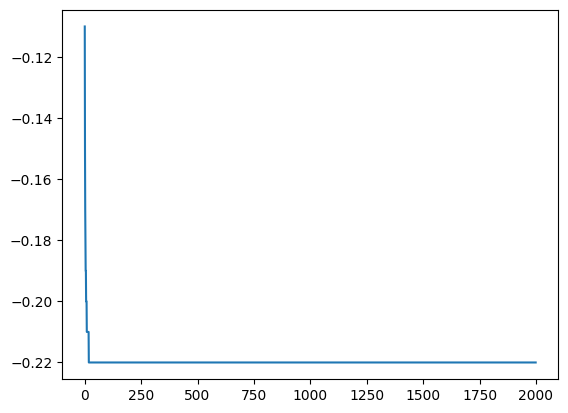

In [167]:
plt.plot(df.iloc[:,0][0:2000])
plt.show()

Looks like the default is -0.22. We thus should move up all of our values by this

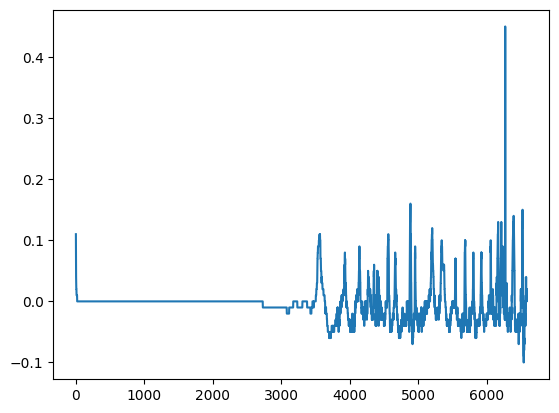

In [168]:
plt.plot([x+0.22 for x in df.iloc[:,0].tolist()])
plt.show()

Much better. We will update it using list logic in the following code block

In [169]:
truncate = 3800 #where we start the data, optimal seems to be around 1980
end = len(list(df.iloc[:,0]))
# end = 6075 # Optimal seems to be 6075
# optimal_end = 6075 # after this is Sam's signal the collection is over and he has stopped

x_axis = [x+0.22 for x in df.iloc[:,0][truncate:end].tolist()]
break_bool = df.iloc[:,1][truncate:end] 
original = data.iloc[:,9][truncate:end]
# print(type(y_axis))


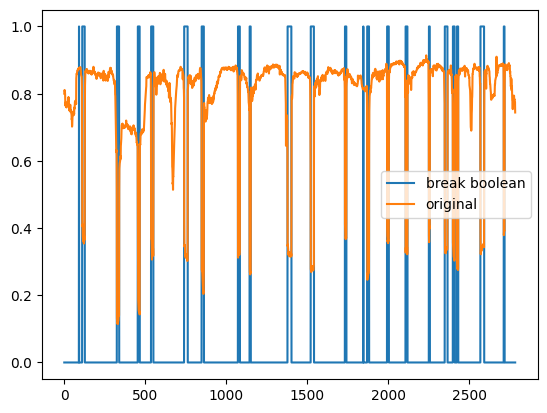

In [170]:
# Let's see how good our thresholding was

plt.plot(break_bool.tolist(), label = "break boolean")

plt.plot([x/1000 for x in original],label='original')


plt.legend()
plt.show()


Looks good!

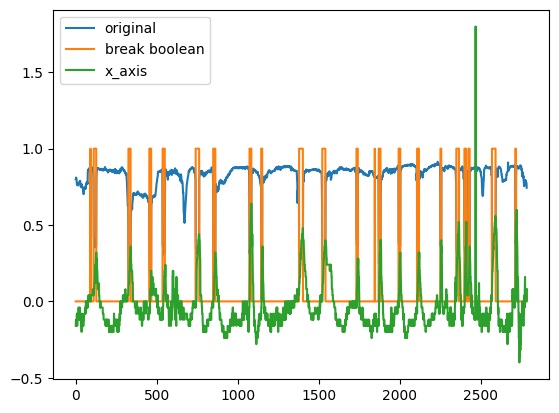

In [171]:
#Let's compare our x_values, labels, and original signal values
plt.plot([x/1000 for x in original],label='original')

plt.plot(break_bool.tolist(), label = "break boolean")

plt.plot([x*4 for x in x_axis], label = "x_axis")



plt.legend()
plt.show()


As we can see, our signals are extremely noisy! We need some filtering to get a good result before training a model.

# Kalman Filter Approach (Not Used for Final Version, but section left for reference)
Using Waveletts doesn't seem to provide much help. As such, let's try using a Kalman filter

In [172]:
import numpy as np
from scipy.linalg import inv

def kalman_filter(data,A,H,Q,R,P):
    """
    Inputs:
    - data (np.array): single dim vector
    - A,H,Q,R,P (np.array): 
        These are the state transition matrix (A), measurement matrix (H), 
        process noise covariance matrix (Q), measurement noise covariance matrix (R), 
        and initial state error covariance matrix (P), respectively.
    Ouputs:
    - y (np.array): filtered version of X
    """
    # Initialize variables
    x = np.array([[data[0]]]) #We start here
    y = np.zeros_like(data) #What we will fill in

    # Run the filter
    for i in range(len(data)):
        # Prediction step
        x = np.dot(A, x)
        P = np.dot(np.dot(A, P), A.T) + Q

        # Update step
        K = np.dot(np.dot(P, H.T), inv(np.dot(np.dot(H, P), H.T) + R))
        x = x + np.dot(K, (data[i] - np.dot(H, x)))
        P = np.dot(np.eye(1) - np.dot(K, H), P)

        # Save the filtered value
        y[i] = x[0, 0]
        #if Nan, set to 0
        if y[i] == 'NaN':
            y[i] = 0

    return y


In [173]:

# """
# Kalman filter parameters A, H, Q, R, and P.

# These are the state transition matrix, measurement matrix, 
# process noise covariance matrix, measurement noise covariance matrix, 
# and initial state error covariance matrix, respectively.
# """
# A = np.array([[1]]) #Set to 1 st x[k+1] = x[k]
# H = np.array([[1]]) #y[k] = H * x[k]

# Q = np.array([[0.01]]) # Amount of noise
# P = np.array([[1]]) # Est err between pred and actual
# R = np.array([[1]]) # Responsiveness

# x_new_kalman = kalman_filter(np.array(x_axis),A,H,Q,R,P)
# y_new_kalman = kalman_filter(np.array(list(y_axis)),A,H,Q,R,P)
# z_new_kalman = kalman_filter(np.array(z_axis),A,H,Q,R,P)

# plt.figure(figsize=(10,4))
# plt.plot([0 if x != x else x for x in x_new_kalman],label = 'x_axis kalman filt')
# # plt.plot([0 if x != x else x for x in y_new_kalman],label = 'y_axis kalman filt') #<--- getting a lot of blank values, idk why
# plt.plot([x*0.3 for x in list(break_bool)],label = "Break label scaled")
# plt.legend()
# plt.show()

# Filtering the Binary case:
This looks much better! we can clearly see the breaking and non-breaking. Now, let's filter the break labels. We collected data by manually covering a photoresistor while riding a bike and as such, there are some cases where we didn't threshold correctly but they are momentary. Let's try runing a sliding window that sets sequences of 1s that are to short to all be 0 

In [174]:
def filtBreak(data,min_len):
    """
    This function takes in an 1D array or list of binary data and filters out cases where sequences of 1s
    are less than "min_len" 
    Inputs:
    - data (array or list):
    - min_len ()

    Ouputs:
    - filtered_data (np.array): filtered sequences
    """
    result = []
    count = 0

    for val in data:
        if val == 1:
            count += 1
        else:
            if count < min_len:
                result.extend([0] * count)
            else:
                result.extend([1] * count)
            result.append(val)
            count = 0

    if count < min_len:
        result.extend([0] * count)
    else:
        result.extend([1] * count)
    return result


# Define test inputs
test_data = np.array([1,1,1,0,0,1,0])
min_len = 3

# Define expected output
expected_output = np.array([1,1,1,0,0,0,0])

# Test the function
print(filtBreak(test_data,2))
assert(list(filtBreak(test_data,2))==list(expected_output))

# Print the results
print("Test passed!")
# 

[1, 1, 1, 0, 0, 0, 0]
Test passed!


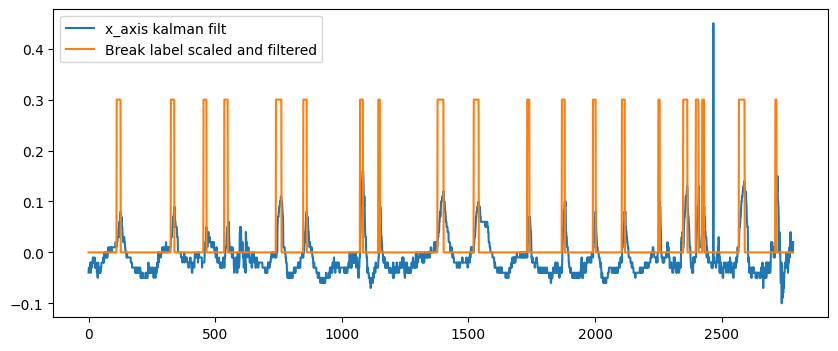

In [175]:
# FILTER our break
min_len = 4
break_bool_filt = filtBreak(list(break_bool),min_len)


plt.figure(figsize=(10,4))
plt.plot([0 if x != x else x for x in x_axis],label = 'x_axis kalman filt')
# plt.plot([x*0.3 for x in list(break_bool)],label = "Break label scaled")
plt.plot([x*0.3 for x in list(break_bool_filt)],label = "Break label scaled and filtered")


plt.legend()
plt.show()

This looks much better! Lets save our results to a csv so we can use this to train a model

In [176]:
import os

directory = "./Data/train"

if not os.path.exists(directory):
    os.makedirs(directory)
    print("Directory", directory, "created.")
else:
    print("Directory", directory, "already exists.")


Directory ./Data/train already exists.


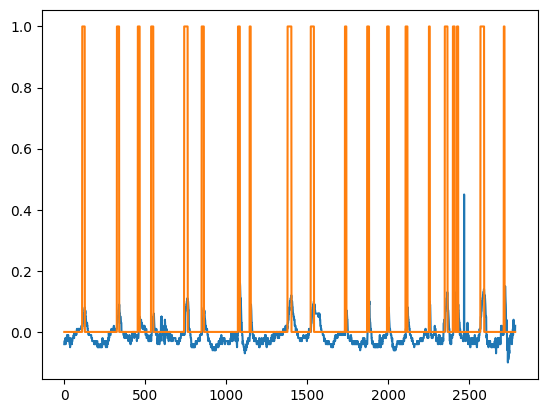

In [177]:
# SAVE DATA:
df_raw = {
    'x_kalhman_filter':[0 if x != x else x for x in list(x_axis)],
    'binary break label': [0 if x != x else x for x in list(break_bool_filt)]
}
df = pd.DataFrame(data=df_raw)
df.to_csv('./Data/train/train_data4.csv')
plt.plot(df.iloc[:,0],label="x_kalhman_filter")
plt.plot(df.iloc[:,1],label="label")
